# Cas Kaggle

## Introducció

La música és un art apreciat per tothom. Abarca una cantitat de públic molt gran degut a la cantitat de classes que hi ha. L'objectiu d'aquest notebook serà predir a quina classe de música pertany cada cançó partint dels seus atributs numèrics com: ballabilitat, clau, energia, sonoritat, etc. 
Poder fer una predicció correcta de la classe pot ser trivial a l'hora de recomanar cançons a escoltar en aplicacions com Spotify, iTunes, YouTube...

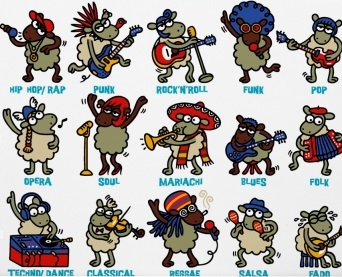

Les llibreries utilitzades per a la realització de la pràctica són:
- Pandas: Utilitzada per a llegir bases de dades d'un .csv i poder-ho manipular de manera senzilla.
- Numpy: Ens permet gestionar grans estructures de dades molt ràpidament.
- Math: Ens permet fer càlculs matemàtics més complexes.
- Matplotlib: Ens permet generar gràfics per entendre millor les dades.
- Seaborn: Com _matplotlib_ però genera gràfics més complexes.
- Sklearn: A partir d'aquesta, utilitzarem els models d'aprenentatge que conté per a fer els classificadors

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve,  auc, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from prettytable import PrettyTable

Llegim la nostra base de dades

In [2]:
dataset = pd.read_csv('../BDD/data.csv')
dataset.head(10)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.000000,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.000000,4,2
7,Randy Travis,On the Other Hand,55.0,0.657,0.415,5.0,-9.915,1,0.0250,0.175000,0.000006,0.1320,0.3470,96.030,3.105783,4,4
8,Professional Murder Music,Slow,29.0,0.431,0.776,10.0,-5.403,1,0.0527,0.000022,0.001300,0.1790,0.3180,120.857,237867.000000,4,8
9,Dudu Aharon,"◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î",14.0,0.716,0.885,1.0,-4.348,0,0.0333,0.061400,NaN,0.2530,0.8330,128.043,164093.000000,4,9


En el nostre cas suposarem que el nom de l'artista i de la cançó no ens interessa aixi que ho treiem. També treiem els duplicats.

In [3]:
dataset = dataset.drop(columns=["Artist Name", "Track Name"])
dataset[dataset.duplicated(keep=False)]
dataset.head(5)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Mirem si hi ha valors nulls de la nostra base de dades. Si n'hi ha, els treiem.

In [4]:
print(dataset.shape)
if(dataset.isnull().values.any()):
    dataset = dataset.dropna()
print(dataset.shape)

(17996, 15)
(11813, 15)


Un cop tenim les dades "netejades", observarem els atributs de la nostra base de dades.

In [5]:
y = np.array(dataset.columns)
print(y)

['Popularity' 'danceability' 'energy' 'key' 'loudness' 'mode'
 'speechiness' 'acousticness' 'instrumentalness' 'liveness' 'valence'
 'tempo' 'duration_in min/ms' 'time_signature' 'Class']


'Class' es l'atribut objectiu de la nostra base de dades ja que, al final del nostre classificador, voldrem saber a quina classe pertany cada cançó. Les diferents classes són:

    0:  Acoustic/Folk
    1:  Alt_Music
    2:  Blues
    3:  Bollywood
    4:  Country
    5:  HipHop
    6:  Indie Alt
    7:  Instrumental
    8:  Metal
    9:  Pop
    10: Rock
    
És important saber cuants atributs tenim de cada classe per a saber si estan o no balancejades les nostres dades.

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 386 1037  956  270  148  517 2039  464 1523 1099 3374]


<BarContainer object of 11 artists>

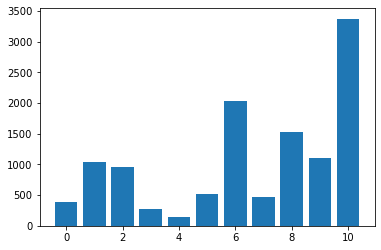

In [6]:
labels = np.array(dataset['Class'])
unique, counts = np.unique(labels, return_counts=True)
print(unique)
print(counts)
plt.bar(unique, counts)

Com podem veure, les classes estan molt desbalancejades, de la classe 4 (Country) trobem 148 dades, en canvi, de la classe 10 (Rock) en tenim 3374. És per això que a l'hora d'analitzar els resultats de la predicció utilitzarem _F1 score_ ja que te en compte la distribuició de les nostres dades.

A continuació visualitzem el mapa de calor de les dades per a observar la seva correlació.

<AxesSubplot:>

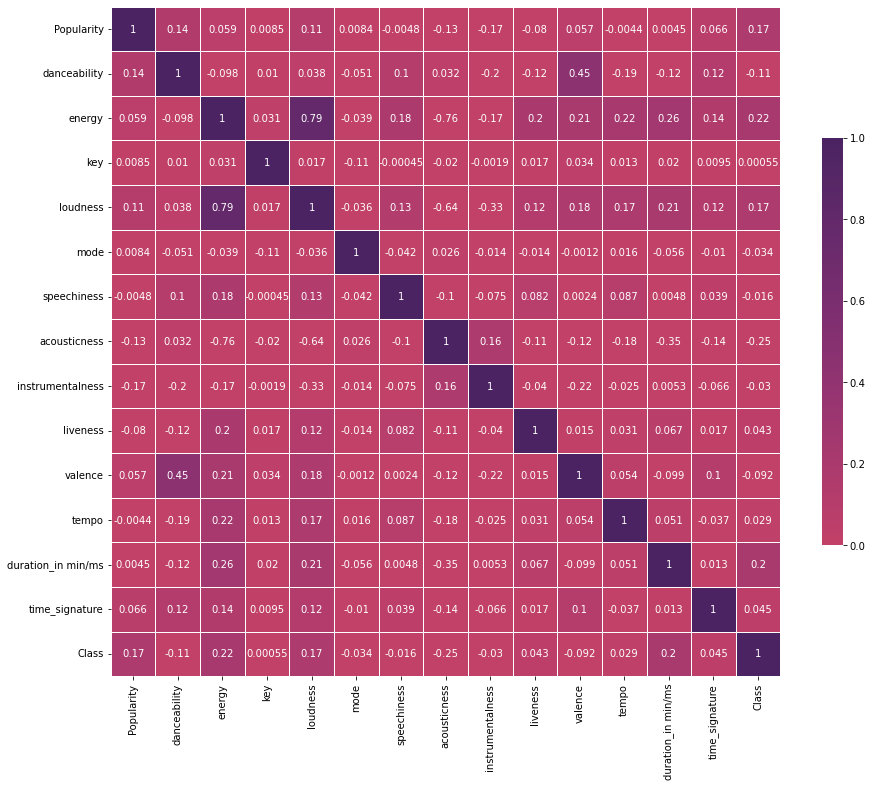

In [7]:
fig, ax = plt.subplots(figsize=(y.shape[0], y.shape[0]))
sns.heatmap(dataset.corr(), ax=ax, vmin=0, cmap='flare', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

La majoria de correlacions son molt pobres però, de moment, tindrem en compte que, les que més pés tindràn seràn: Popularity, Energy, Loudness i Duration.

Mostrem els diagrames de dispersió i historgàmes de cada atribut.

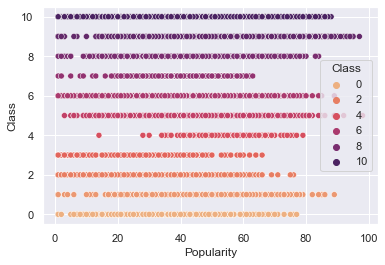

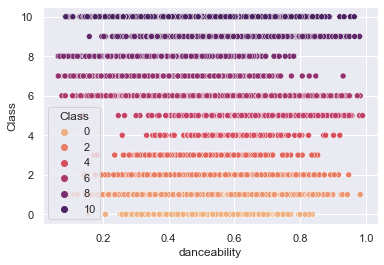

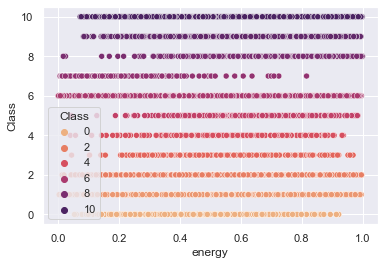

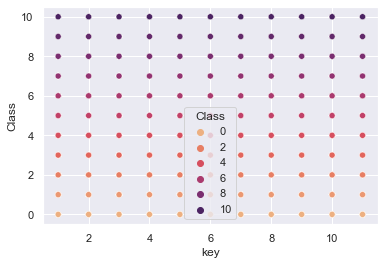

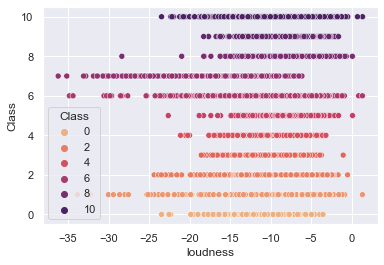

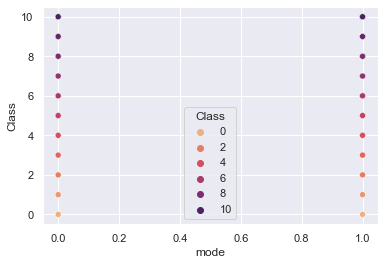

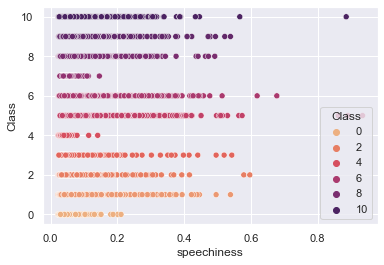

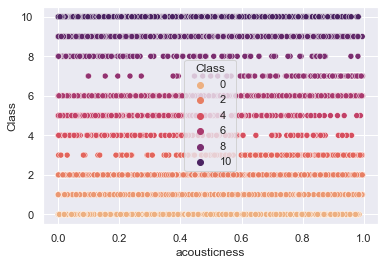

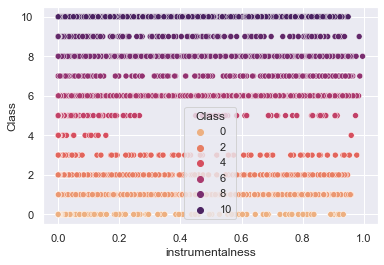

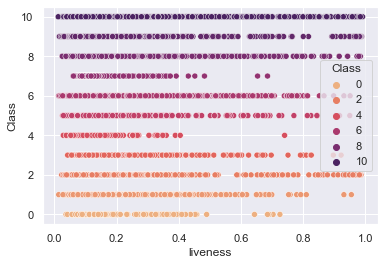

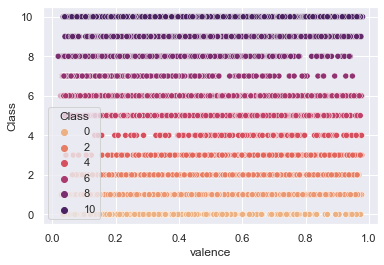

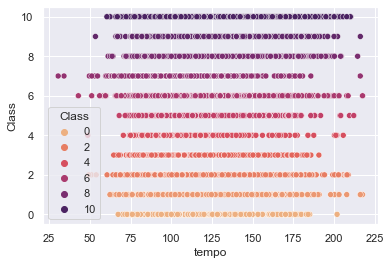

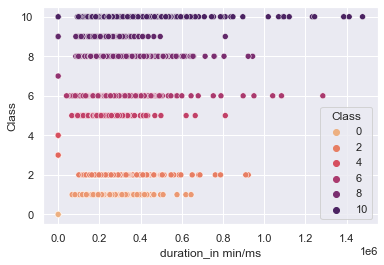

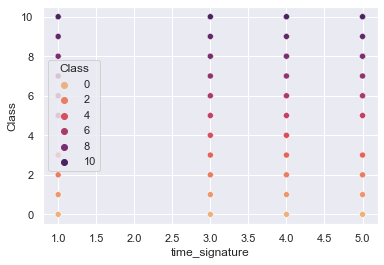

In [8]:
plt.figure()
sns.set()
for i in range(dataset.shape[1] - 1):
    sns.scatterplot(data=dataset, x=y[i], y=y[-1], palette='flare', hue="Class")
    plt.show()

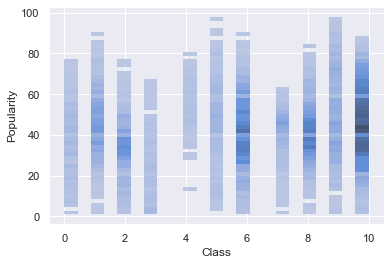

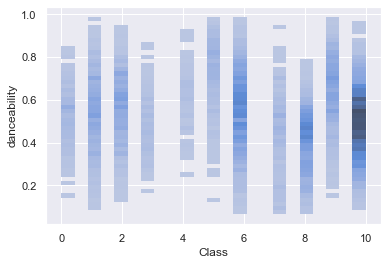

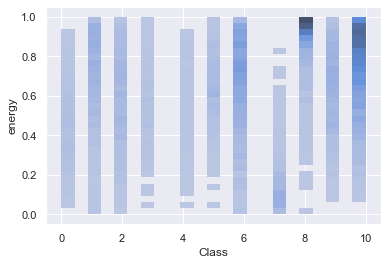

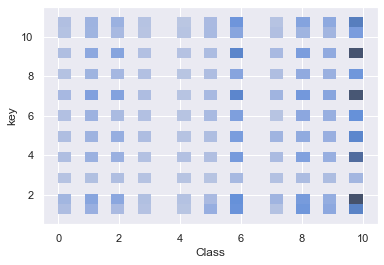

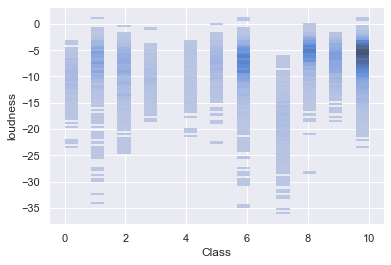

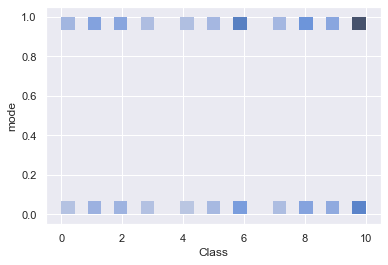

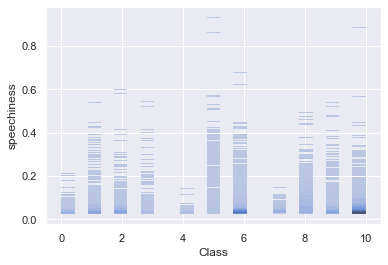

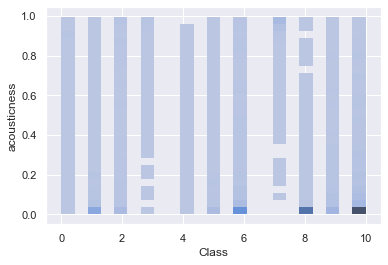

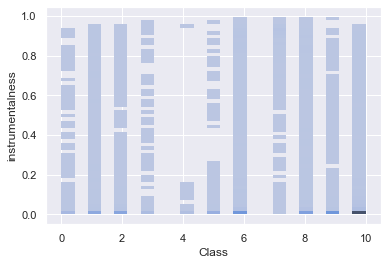

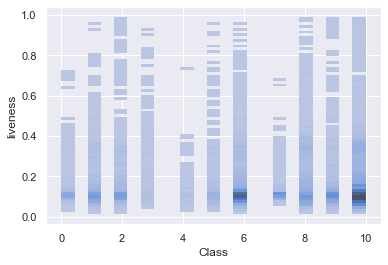

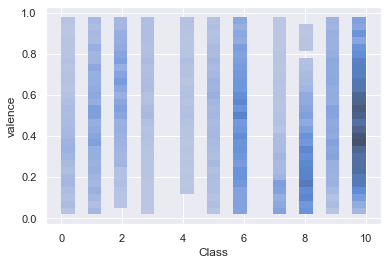

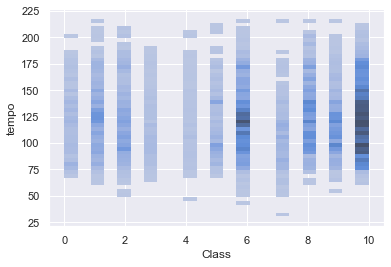

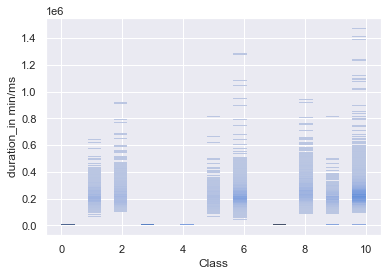

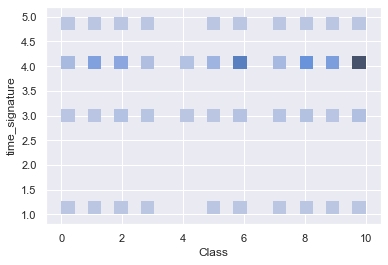

In [9]:
plt.figure()
sns.set()
for i in range(dataset.shape[1] - 1):
    sns.histplot(data=dataset, x="Class", y=y[i], palette='flare')
    plt.show()


Un cop estudiada la base de dades apliquem diferents classificadors per a estudiar-ne la presició.
Veient la dispersió i com de desbalancejades estàn les nostres dades, podriem dir que no obtindrem resultats molt precisos.

## Classificadors

És molt important que, abans no comencem a entrenar els nostres models, preparem les dades per a aquesta gestió. Per a fer aquest preprocessament haurem d'escalar les dades ja que, molts atributs treballen amb rangs diferents (per exemple, la ballabilitat si que va de 0 a 1 però, la duració es mesura en min/ms i dona valors molt elevats).

Mirarem quines son les proporcions que tenim de cada classe per que a l'hora de dividir la el conjunt de dades en train i test, no quedin desbalancejades.

In [10]:
def class_proportions(data):
    clas, counts = np.unique(data, return_counts = True)
    freq = counts / data.shape[0]
    for f, c in zip(freq, clas):
        print("Classe:", c, ", Freqüència:", f)

In [11]:
X = dataset.drop(columns=["Class"]).values
target = dataset.values[:,-1]

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

print("Valor minim: ", np.amin(X), " - Valor maxim: ", np.amax(X))

print("Proporcions generals: ")
class_proportions(target)

Valor minim:  0.0  - Valor maxim:  1.0000000000000002
Proporcions generals: 
Classe: 0.0 , Freqüència: 0.032675865571827646
Classe: 1.0 , Freqüència: 0.08778464403623128
Classe: 2.0 , Freqüència: 0.08092779141623635
Classe: 3.0 , Freqüència: 0.02285617539998307
Classe: 4.0 , Freqüència: 0.012528570219249979
Classe: 5.0 , Freqüència: 0.04376534326589351
Classe: 6.0 , Freqüència: 0.17260645052061288
Classe: 7.0 , Freqüència: 0.03927876068737831
Classe: 8.0 , Freqüència: 0.1289257597562008
Classe: 9.0 , Freqüència: 0.09303309912807924
Classe: 10.0 , Freqüència: 0.28561753999830697


Dividim el conjunt total de dades en train i test, mirarem que les cada classe tingui una freqüència d'aparició semblant al conjunt total.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, target, train_size=0.8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print("Proporcions post split: ")
class_proportions(y_train)

(9450, 14) (2363, 14) (9450,) (2363,)
Proporcions post split: 
Classe: 0.0 , Freqüència: 0.03185185185185185
Classe: 1.0 , Freqüència: 0.0855026455026455
Classe: 2.0 , Freqüència: 0.08042328042328042
Classe: 3.0 , Freqüència: 0.02402116402116402
Classe: 4.0 , Freqüència: 0.01291005291005291
Classe: 5.0 , Freqüència: 0.042328042328042326
Classe: 6.0 , Freqüència: 0.1688888888888889
Classe: 7.0 , Freqüència: 0.0401058201058201
Classe: 8.0 , Freqüència: 0.13111111111111112
Classe: 9.0 , Freqüència: 0.0944973544973545
Classe: 10.0 , Freqüència: 0.28835978835978837


Veiem que la freqüència d'aparició és semblant en ambdos casos així que podem dir que hem agafat una bona proporció de les dades. Tot hi això, al tenir les dades de les classes tant desbalancejades, hi haurà classes que haurem entrenat amb moltes més dades que altres.

In [13]:
def mostrar_resultats(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=unique, yticklabels=unique, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y, zero_division=1))

### Regressió logística

La regressió logística és un model de classificador per a variables categòriques a partir de variables independents. Basa la seva divisió en la funció sigmoidea que converteix els valors en 0 o 1, així podem decidir si pertany a una classe o a una altra. En aquest cas, haurem de saber a quina de les 11 classes pertany.

Ratio de classificació correcta en Regressió logística:  0.464240372407956


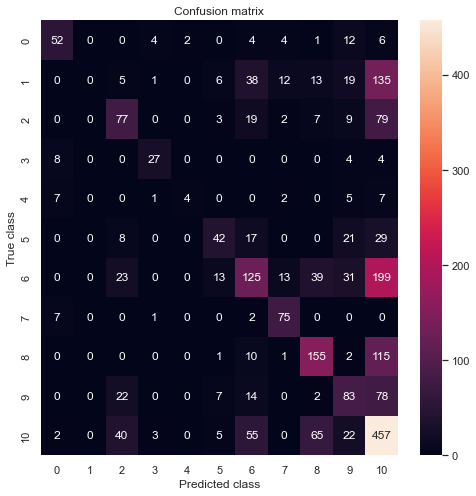

              precision    recall  f1-score   support

         0.0       0.68      0.61      0.65        85
         1.0       1.00      0.00      0.00       229
         2.0       0.44      0.39      0.42       196
         3.0       0.73      0.63      0.68        43
         4.0       0.67      0.15      0.25        26
         5.0       0.55      0.36      0.43       117
         6.0       0.44      0.28      0.34       443
         7.0       0.69      0.88      0.77        85
         8.0       0.55      0.55      0.55       284
         9.0       0.40      0.40      0.40       206
        10.0       0.41      0.70      0.52       649

    accuracy                           0.46      2363
   macro avg       0.60      0.45      0.45      2363
weighted avg       0.53      0.46      0.43      2363



In [14]:
log_reg_model = LogisticRegression(max_iter = 300)
log_reg_model.fit(x_train, y_train)
log_reg_score = log_reg_model.score(x_test, y_test)
print ("Ratio de classificació correcta en Regressió logística: ", log_reg_score)
y_pred = log_reg_model.predict(x_test)

mostrar_resultats(y_test, y_pred)

No utilitzarem el parametre _weight_class = 'balanced'_ ja que obtenim un pitjor resultat. Dona més importancia a altres classes i les prediccions es troben més disperses.

### K-Nearest Neighborgs

El classificador K-Nearest Neighborgs decideix a quina classe pertany cada dada segons la classe dels k punts veins ja predits (ja que és un mètode d'aprenentatge supervisat). Depenent el número de veins que escollim, el resultat variarà però ara executarem el model amb els paràmetres per defecte i més tard ho posarem a prova.

Ratio de classificació correcta en KNN:  0.3592890393567499


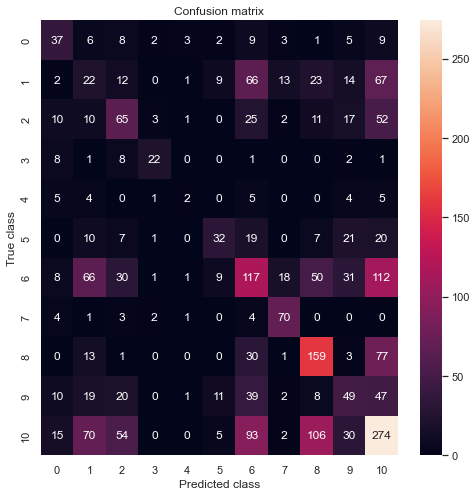

              precision    recall  f1-score   support

         0.0       0.37      0.44      0.40        85
         1.0       0.10      0.10      0.10       229
         2.0       0.31      0.33      0.32       196
         3.0       0.69      0.51      0.59        43
         4.0       0.20      0.08      0.11        26
         5.0       0.47      0.27      0.35       117
         6.0       0.29      0.26      0.27       443
         7.0       0.63      0.82      0.71        85
         8.0       0.44      0.56      0.49       284
         9.0       0.28      0.24      0.26       206
        10.0       0.41      0.42      0.42       649

    accuracy                           0.36      2363
   macro avg       0.38      0.37      0.37      2363
weighted avg       0.35      0.36      0.35      2363



In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_score = knn_model.score(x_test, y_test)
print ("Ratio de classificació correcta en KNN: ", knn_score)
y_pred = knn_model.predict(x_test)

mostrar_resultats(y_test, y_pred)

### Arbres de decisió

Els arbres de decisió són uns classificadors senzills d'implementar per a dades no numèriques ja que formen una estructura lògica amb forma d'arbre on a cada pas es ramifica per l'atribut escollit i els diferents valors que pot prendre. Per variables continues es solen crear intervals per a convertir-les a discretes.

Ratio de classificació correcta en Arbres de desició:  0.33389758781210327


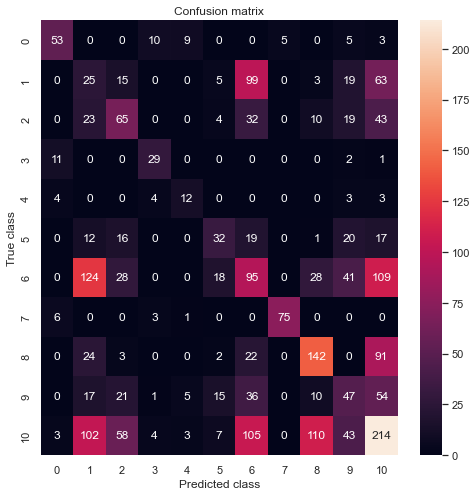

              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65        85
         1.0       0.08      0.11      0.09       229
         2.0       0.32      0.33      0.32       196
         3.0       0.57      0.67      0.62        43
         4.0       0.40      0.46      0.43        26
         5.0       0.39      0.27      0.32       117
         6.0       0.23      0.21      0.22       443
         7.0       0.94      0.88      0.91        85
         8.0       0.47      0.50      0.48       284
         9.0       0.24      0.23      0.23       206
        10.0       0.36      0.33      0.34       649

    accuracy                           0.33      2363
   macro avg       0.42      0.42      0.42      2363
weighted avg       0.34      0.33      0.34      2363



In [16]:
des_tree_model = DecisionTreeClassifier()
des_tree_model.fit(x_train, y_train)
des_tree_score = des_tree_model.score(x_test, y_test)
print ("Ratio de classificació correcta en Arbres de desició: ", des_tree_score)

y_pred = des_tree_model.predict(x_test)

mostrar_resultats(y_test, y_pred)

### Support Vector Machines

Les màquines de vectors de suport (SVM) classifiquen buscant la major distància entre classes per a poder crear una recta que les divideixi. En el cas que no poguem separar les dades linealment, afegirem dimensions (amb els kernels) per a poder dividir-ho tot bé. Aquestes dimensions ens donen resultats molt bons però comporten un gran cost de càlcul.

Ratio de classificació correcta en SVM:  0.47355057130765976


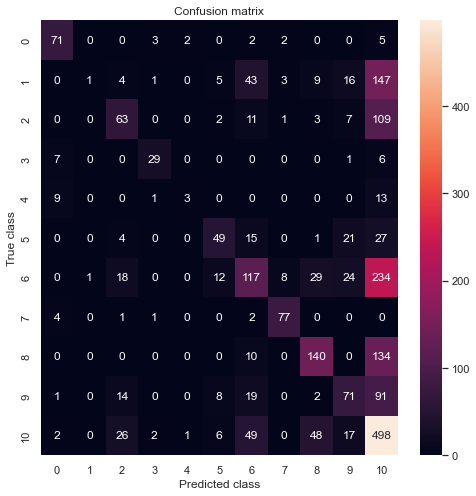

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.79        85
         1.0       0.50      0.00      0.01       229
         2.0       0.48      0.32      0.39       196
         3.0       0.78      0.67      0.72        43
         4.0       0.50      0.12      0.19        26
         5.0       0.60      0.42      0.49       117
         6.0       0.44      0.26      0.33       443
         7.0       0.85      0.91      0.87        85
         8.0       0.60      0.49      0.54       284
         9.0       0.45      0.34      0.39       206
        10.0       0.39      0.77      0.52       649

    accuracy                           0.47      2363
   macro avg       0.58      0.47      0.48      2363
weighted avg       0.50      0.47      0.44      2363



In [17]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_score = svm_model.score(x_test, y_test)
print ("Ratio de classificació correcta en SVM: ", svm_score)

y_pred = svm_model.predict(x_test)

mostrar_resultats(y_test, y_pred)

Veient els resultats obtinguts, podem dir que les nostres prediccions són molt pobres. Volten entre el 0.48 i 0.52 en la score. Això pot ser donat per diferents motius però, generalment, el que més problemes ens dona és que la nostra base de dades està molt desbalancejada. Com hem vist abans, la classe més minoritària té 148 dades mentres que la majoritària en té 3374. És per això que l'última classe (la majoritària) té molt més pes que no pas totes les altres.

Aquest fet és reflexa clarament en les matrius de confusió generades on podem veure que tota la diagonal dona valors molt fluixos menys l'última classe en la que trobem un gran número d'encerts. Això també explica per que la columna de la classe 10 té molts falsos positius en altres classes (fins hi tot més que els certs positius d'aquella mateixa classe!).

## Corbes PR

La curva PR es el resultat de dibuixar la gráfica entre la presició (el ratio de classificacions correctes) i el recall (el ratio de positius detectats en total). Per definició, si augmentem un dels dos, en disminuirà l'altre. La idea es que la corba que marca aquesta gràfica s'aproximi el màxim possible a dalt a la dreta, ja que el que volem es que tots els _true_ que tenim siguin _true positives_. Això, sent realistes, és impossible ja que sempre tindrem un tant per cent d'error.

### Regressió logística

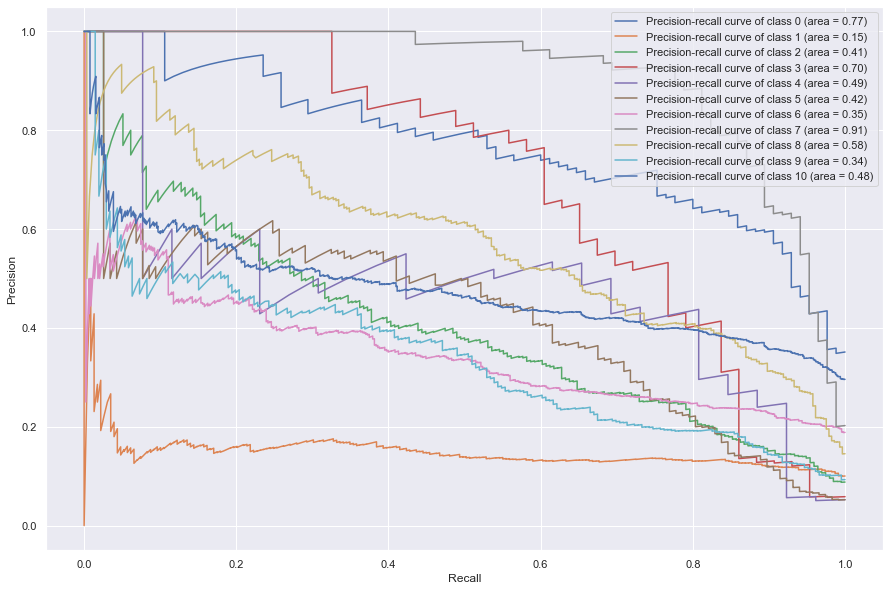

In [18]:
probs = log_reg_model.predict_proba(x_test)
precision = {}
recall = {}
average_precision = {}
plt.figure(figsize=(15,10))
for i in range(11):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
plt.show()

### K-Nearest Neighbors

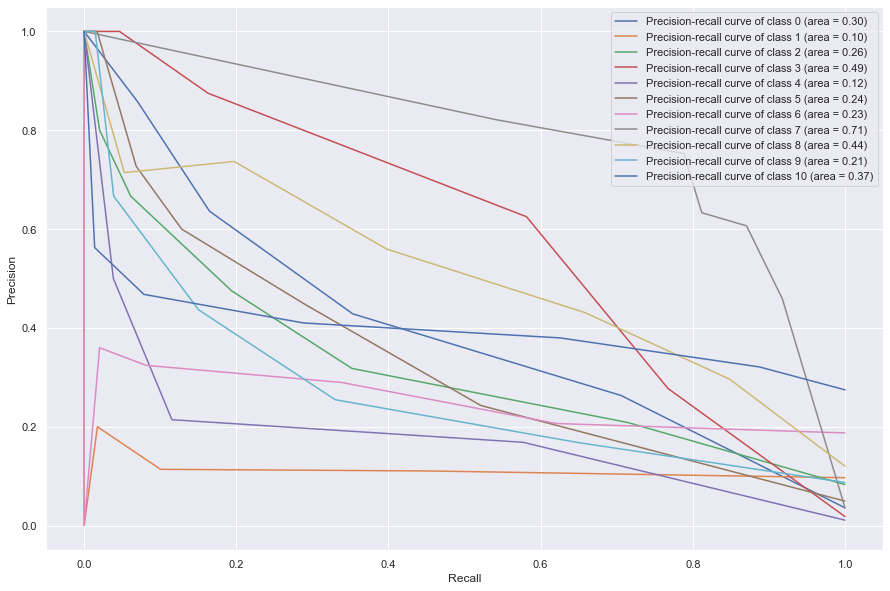

In [19]:
probs = knn_model.predict_proba(x_test)
precision = {}
recall = {}
average_precision = {}
plt.figure(figsize=(15,10))
for i in range(11):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
plt.show()

### Arbres de desició

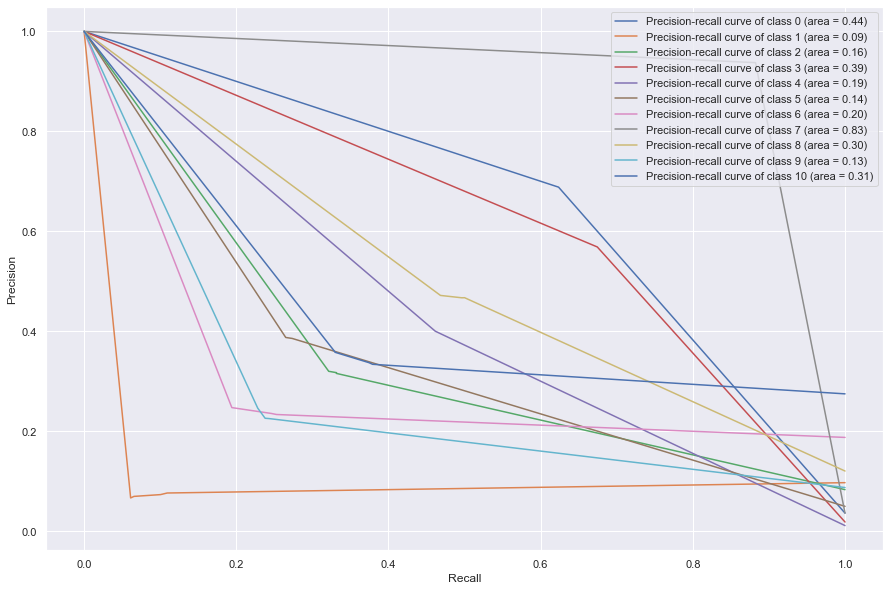

In [20]:
probs = des_tree_model.predict_proba(x_test)
precision = {}
recall = {}
average_precision = {}
plt.figure(figsize=(15,10))
for i in range(11):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
plt.show()

### Support Vector Machines

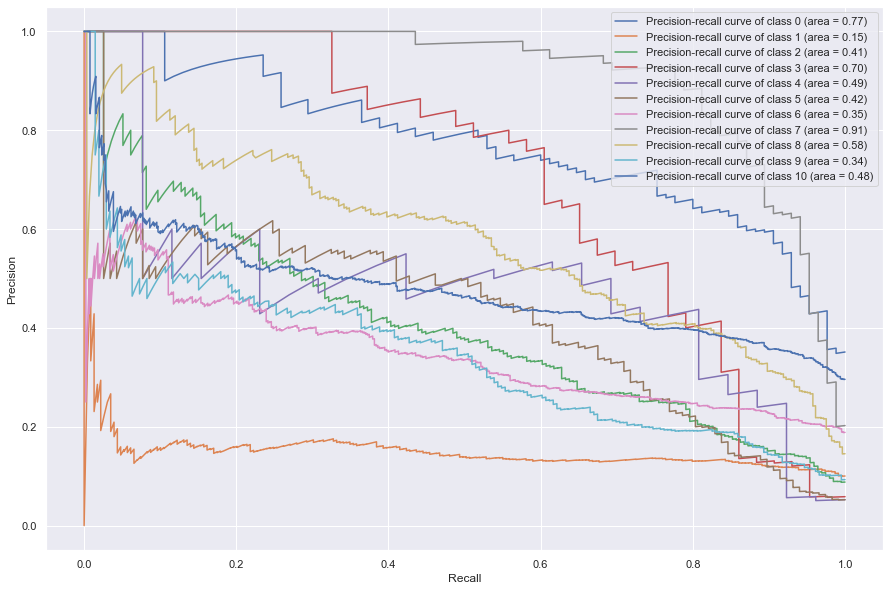

In [21]:
svm_model = svm.SVC(probability = True)
svm_model.fit(x_train, y_train)

probs = log_reg_model.predict_proba(x_test)
precision = {}
recall = {}
average_precision = {}
plt.figure(figsize=(15,10))
for i in range(11):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
plt.show()

Per a tots els models podem extrapolar les mateixes conclusions, les classes 3 i 7 obtenim una corba prou satisfactoria i per a les 1 i 6 obtenim resultats molt pobres. Això pot ser degut per la semblança de les dades entre diferents classes (ja que estem parlant de generes musicals, hi ha molts que per estadístiques numèriques són semblans) i que el classificador tingui dificultat a l'hora de separar bé.

## Corbes ROC

PLa corba ROC és una representació gràfica que ilustra la relacio entre la sensibilitat (ratio de certs positius) i la especifitat (ratio de certs negatius) d'un sistema classificador. Indicaràn un millor rendiment els classificadors que s'aproximen més a dalt a l'esquerra ja que indicarà que tots s'han predit correctament. Al mig traçarem una línia discontínua que indica com sería la predicció amb 50% d'encerts (aleatoriament).
En cada classificador. mostrarem una corba per a cada classe.

### Regressió logística

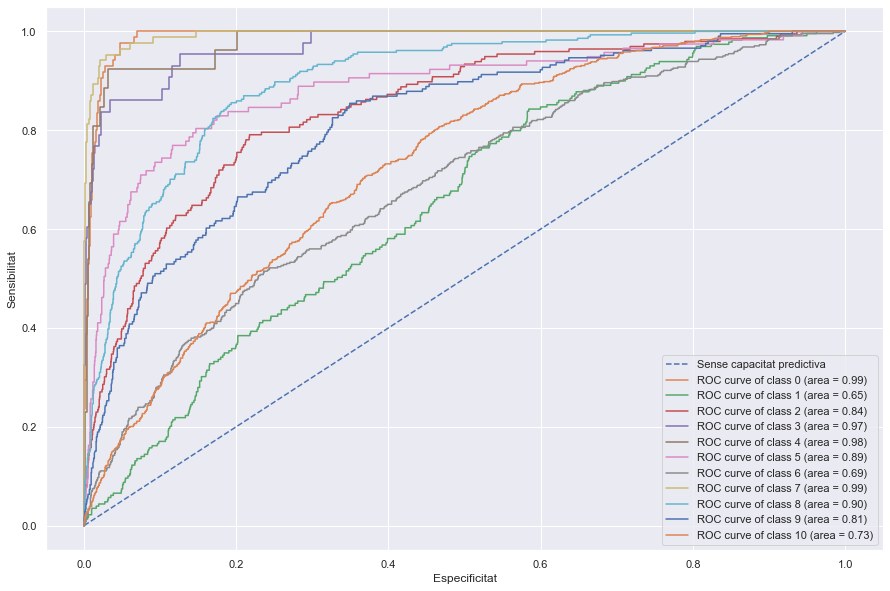

In [22]:
probs = log_reg_model.predict_proba(x_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(11):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(15,10))
rnd_fpr, rnd_tpr, _ = roc_curve(y_test>0, np.zeros(y_test.size))
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Sense capacitat predictiva')
for i in range(11):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.xlabel('Especificitat')
    plt.ylabel('Sensibilitat')
plt.legend()
plt.show()

### K-Nearest Neighbors

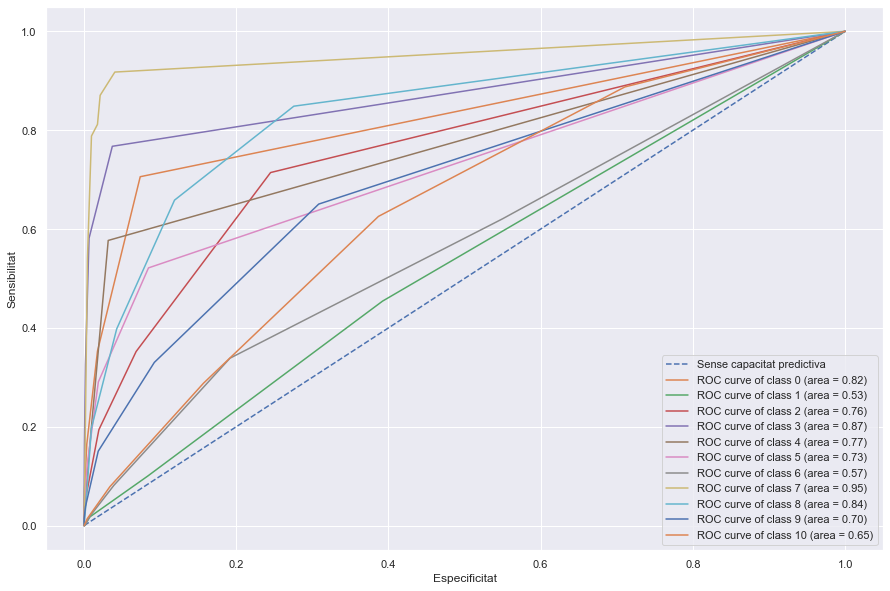

In [23]:
probs = knn_model.predict_proba(x_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(11):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(15,10))
rnd_fpr, rnd_tpr, _ = roc_curve(y_test>0, np.zeros(y_test.size))
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Sense capacitat predictiva')
for i in range(11):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.xlabel('Especificitat')
    plt.ylabel('Sensibilitat')
plt.legend()
plt.show()

### Arbres de desició

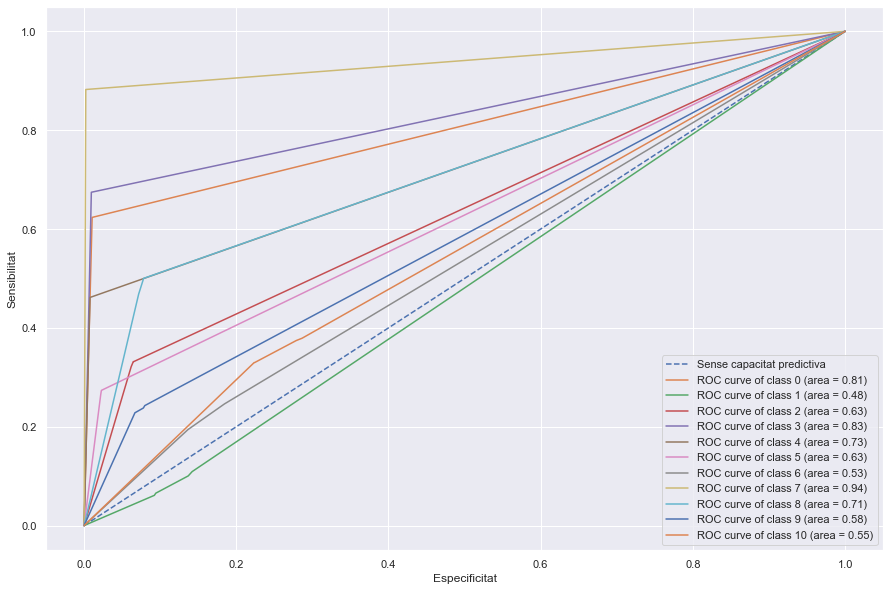

In [24]:
probs = des_tree_model.predict_proba(x_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(11):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(15,10))
rnd_fpr, rnd_tpr, _ = roc_curve(y_test>0, np.zeros(y_test.size))
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Sense capacitat predictiva')
for i in range(11):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.xlabel('Especificitat')
    plt.ylabel('Sensibilitat')
plt.legend()
plt.show()

### Support Vector Machines

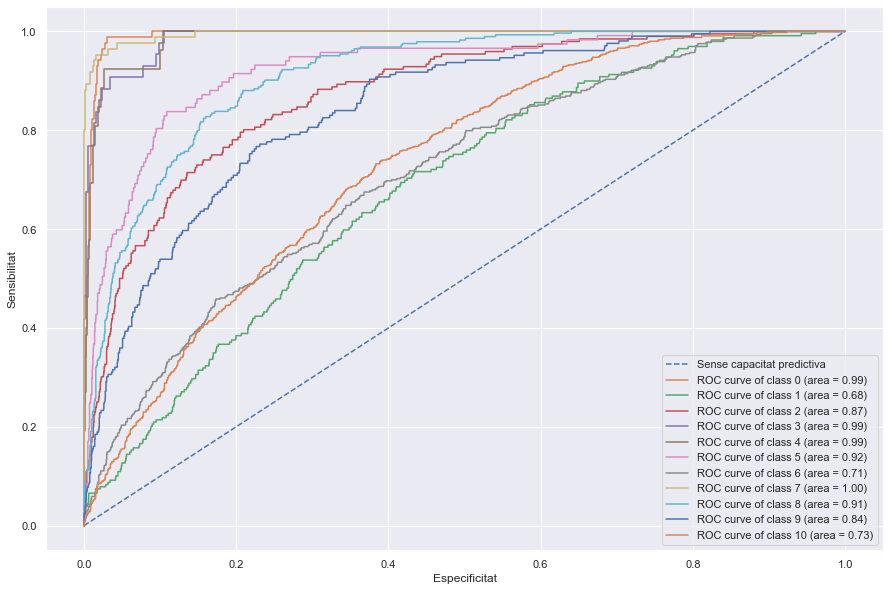

In [25]:
probs = svm_model.predict_proba(x_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(11):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(15,10))
rnd_fpr, rnd_tpr, _ = roc_curve(y_test>0, np.zeros(y_test.size))
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Sense capacitat predictiva')
for i in range(11):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.xlabel('Especificitat')
    plt.ylabel('Sensibilitat')
plt.legend()
plt.show()

Podem observar que, per a cada classe obtenim un resultat sempre per sobre de la mitja, tot hi que algunes prediccions s'hi apropen molt. Això és normal en classificadors amb moltes classes diferents ja que es possible que, com hem explicat abans, dos gèneres musicals s'assembin molt en les métriques numèriques i sigui dificil diferenciar-les.

Cal destacar que en tots els classificadors, la classe que pitjor rendiment mostra és la classe 1 (música alternativa). Fins al punt de en els arbres de desició mostrar una corba igual a la línia discontinua (sense capacitat predictiva). Per altra banda, la classe 7 (intrumental) mostra un gran rendiment en tots els classificadors.

## Búsqueda dels millors hiperparàmetres

Per ara, hem aplicat als nostres classificadors els paràmetres per defecte. Aquests estàn "bé" en general però, modificant-los podem arribar a obtenir uns resultats molt millors. Fent aquestes proves podrem veure quin model és realment el classificador que millor predirà el nostre conjunt i alhora saber quins son els paràmetres que el màximitzen. 
Per a fer-ho utiliztem les funcion GridSearchCV o RandomizedSearchCV. La primera provarà totes les combinacions possibles entre els paràmetres que indiquem, és molt precisa però tardarà molt. En canvi, la segona prova aleatoriament les combinacions sense provar-les totes, és menys fiable pero més ràpida. 

In [26]:
parametres_reg_log = {'tol': [0.01, 0.001, 0.0001],
                      'C': [1.0, 1.5, 2.0],
                      'fit_intercept': [True, False],
                      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'class_weight': ['balanced', None]}

parametres_knn = {'n_neighbors': range(20, 50, 2),
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['ball_tree', 'kd_tree'],
                  'leaf_size': range(20, 50, 2)}

parametres_arbre_des = {'criterion': ['gini', 'entropy'],
                        'splitter': ['best', 'random'],
                        'min_samples_split': [2, 5, 10, 20],
                        'max_features': ['auto', 'sqrt', 'log2', None],
                        'class_weight': ['balanced', None]}

parametres_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'tol': [0.01, 0.001, 0.0001],
                  'C': [1.0, 1.5, 2.0],
                  'decision_function_shape': ['ovo', 'ovr'],
                  'degree': range(1, 11),
                  'class_weight': ['balanced', None]}

### Regressió logística

In [27]:
grid_reg_log = GridSearchCV(LogisticRegression(max_iter = 600), parametres_reg_log, cv=5, verbose=2, n_jobs=-1)
grid_reg_log.fit(x_train,y_train)
print("Els millors parametres: " + str(grid_reg_log.best_params_))
print("La millor score: " + str(grid_reg_log.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test, grid_reg_log.predict(x_test)))))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Els millors parametres: {'C': 1.5, 'class_weight': None, 'fit_intercept': True, 'solver': 'sag', 'tol': 0.01}
La millor score: 0.47597883597883606
Error quadratic mitja: 3.846669778866237


### KNN

In [28]:
grid_knn = RandomizedSearchCV(KNeighborsClassifier(), parametres_knn, n_iter = 100, cv=5, verbose=2, n_jobs=-1)
grid_knn.fit(x_train,y_train)
print("Els millors parametres: " + str(grid_knn.best_params_))
print("La millor score: " + str(grid_knn.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test, grid_knn.predict(x_test)))))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Els millors parametres: {'weights': 'uniform', 'n_neighbors': 38, 'leaf_size': 30, 'algorithm': 'ball_tree'}
La millor score: 0.42719576719576724
Error quadratic mitja: 3.9879738809311953


### Arbres de decisió

In [29]:
grid_des_tree = GridSearchCV(DecisionTreeClassifier(), parametres_arbre_des, cv=5, verbose=2, n_jobs=-1)
grid_des_tree.fit(x_train,y_train)
print("Els millors parametres: " + str(grid_des_tree.best_params_))
print("La millor score: " + str(grid_des_tree.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test, grid_des_tree.predict(x_test)))))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Els millors parametres: {'class_weight': None, 'criterion': 'entropy', 'max_features': None, 'min_samples_split': 20, 'splitter': 'random'}
La millor score: 0.41259259259259257
Error quadratic mitja: 3.9780395905950883


### SVM

In [30]:
grid_svm = RandomizedSearchCV(svm.SVC(), parametres_svm, n_iter = 100, cv=5, verbose=2, n_jobs=-1)
grid_svm.fit(x_train,y_train)
print("Els millors parametres: " + str(grid_svm.best_params_))
print("La millor score: " + str(grid_svm.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test, grid_svm.predict(x_test)))))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Els millors parametres: {'tol': 0.0001, 'kernel': 'poly', 'degree': 3, 'decision_function_shape': 'ovr', 'class_weight': None, 'C': 1.5}
La millor score: 0.4992592592592592
Error quadratic mitja: 3.7895886060089765


Per a visualitzar millor els canvis, utilitzarem la funció PrettyTable i mostrarem per a cada classificador el seu resultat abans i després de la búsqueda dels seus hiperparàmetres.

In [32]:
table = PrettyTable()
table.field_names = ["Model", "F1 score abans", "F1 score després"]
table.add_row(["Regressor Lineal", log_reg_score, grid_reg_log.best_score_])
table.add_row(["KNN", knn_score, grid_knn.best_score_])
table.add_row(["Arbres de desició", des_tree_score, grid_des_tree.best_score_])
table.add_row(["SVM", svm_score, grid_svm.best_score_])
print(table)

+-------------------+---------------------+---------------------+
|       Model       |    F1 score abans   |   F1 score després  |
+-------------------+---------------------+---------------------+
|  Regressor Lineal |  0.464240372407956  | 0.47597883597883606 |
|        KNN        |  0.3592890393567499 | 0.42719576719576724 |
| Arbres de desició | 0.33389758781210327 | 0.41259259259259257 |
|        SVM        | 0.47355057130765976 |  0.4992592592592592 |
+-------------------+---------------------+---------------------+


## Conclusions